In [1]:
import pandas as pd
from sklearn import datasets
wine_data = datasets.load_wine()
df_wine = pd.DataFrame(wine_data.data,columns=wine_data.feature_names)
df_wine['target'] = pd.Series(wine_data.target)

In [2]:
from sklearn.model_selection import train_test_split
X = df_wine.drop(['target'], axis=1)
y = df_wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [12]:
import itertools

In [11]:
from sklearn import model_selection

In [13]:
X_train_ml = X_train[['proline', 'color_intensity']].values
y_train_ml = y_train.values

In [14]:
X_train_ml

array([[1.515000e+03, 6.900000e+00],
       [6.070000e+02, 3.800000e+00],
       [1.095000e+03, 5.430000e+00],
       [1.280000e+03, 6.200000e+00],
       [8.350000e+02, 1.020000e+01],
       [5.200000e+02, 3.050000e+00],
       [1.065000e+03, 4.900000e+00],
       [7.250000e+02, 7.900000e+00],
       [2.900000e+02, 2.150000e+00],
       [6.250000e+02, 3.250000e+00],
       [1.270000e+03, 6.000000e+00],
       [4.950000e+02, 1.950000e+00],
       [3.450000e+02, 2.060000e+00],
       [9.200000e+02, 5.100000e+00],
       [6.300000e+02, 3.800000e+00],
       [5.500000e+02, 9.400000e+00],
       [1.480000e+03, 7.800000e+00],
       [5.700000e+02, 5.580000e+00],
       [5.100000e+02, 3.400000e+00],
       [1.235000e+03, 5.400000e+00],
       [5.150000e+02, 5.000000e+00],
       [3.550000e+02, 2.950000e+00],
       [4.800000e+02, 2.400000e+00],
       [4.280000e+02, 3.800000e+00],
       [1.260000e+03, 8.900000e+00],
       [3.800000e+02, 2.800000e+00],
       [3.250000e+02, 2.000000e+00],
 

/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

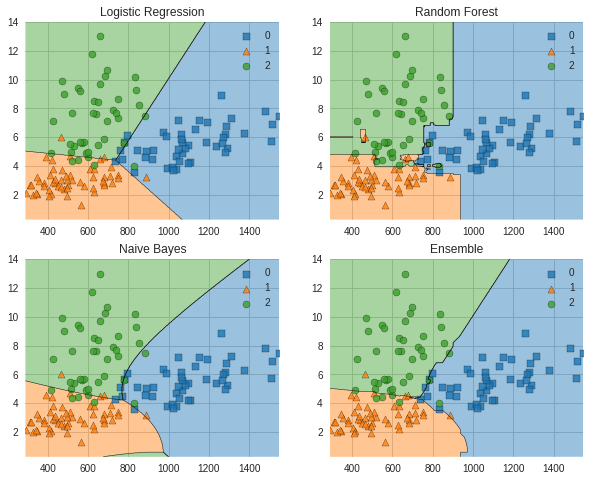

In [15]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])
value=1.5
width=0.75
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):
                         
    clf.fit(X_train_ml, y_train_ml)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_ml, y=y_train_ml, clf=clf)
    plt.title(lab)